In [ ]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 103.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


# **Phrase Grounding by User Defined CAPTION**

In [ ]:
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the image
image_path = "livingroom.jpg"
image = Image.open(image_path)

# Initialize the processor and model
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True).eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

Florence2ForConditionalGeneration(
  (vision_tower): DaViT(
    (convs): ModuleList(
      (0): ConvEmbed(
        (proj): Conv2d(3, 256, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (1): ConvEmbed(
        (proj): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (2): ConvEmbed(
        (proj): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      )
      (3): ConvEmbed(
        (proj): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      )
    )
    (blocks): ModuleList(
      (0): MySequential(
        (0): MySequential(
          (spatial_block): SpatialBlock(
            (conv1): PreNorm(
              (fn): De

In [ ]:
# Define the prompt and caption
prompt = "<CAPTION_TO_PHRASE_GROUNDING>"
caption = "A serene living space showcasing a modern armchair, a leafy potted plant, and a standing lamp casting a warm glow."

# Prepare inputs
inputs = processor(text=prompt + " " + caption, images=image, return_tensors="pt").to(device)

# Generate outputs
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=512,
    num_beams=3,
    do_sample=False,
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

# Post-process the output
result = processor.post_process_generation(
    generated_text,
    task=prompt,
    image_size=(image.width, image.height)
)


In [ ]:
# Extract bounding boxes and labels
bboxes = result[prompt]['bboxes']
labels = result[prompt]['labels']

In [ ]:
# Define a color map
color_map = plt.cm.get_cmap('hot')  # 'tab10' has 10 distinct colors

# Assign a unique color to each label
unique_labels = list(set(labels))
label_colors = {label: color_map(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

<ipython-input-5-b5acb699ab18>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('hot')  # 'tab10' has 10 distinct colors


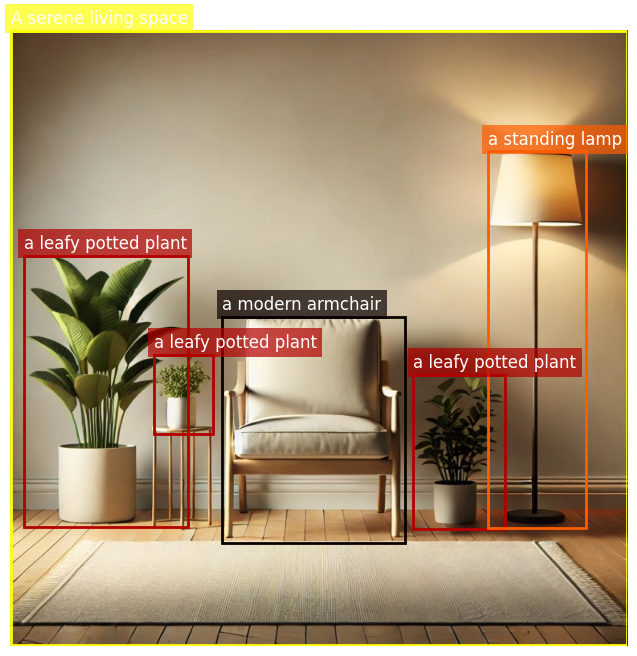

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

# Display the image
ax.imshow(image)

# Add bounding boxes and labels
for bbox, label in zip(bboxes, labels):
    # Unpack the bounding box coordinates
    x1, y1, x2, y2 = bbox

    # Calculate width and height
    width = x2 - x1
    height = y2 - y1

    # Get the color for the current label
    color = label_colors[label]

    # Create a rectangle patch
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')

    # Add the rectangle to the plot
    ax.add_patch(rect)

    # Add the label with a matching background color
    plt.text(x1, y1 - 10, label, color='white', fontsize=12,
             bbox=dict(facecolor=color, edgecolor='none', alpha=0.7))

# Remove axis
plt.axis('off')

# Show the plot
plt.show()



# **Phrase Grounding by Generating CAPTION**

In [ ]:
# Define the captioning prompt
caption_prompt = "<CAPTION>"

# Prepare inputs for captioning
inputs = processor(text=caption_prompt, images=image, return_tensors="pt").to(device)

# Generate the caption
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=500,
    num_beams=3,
    do_sample=False,
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Extract the generated caption
caption = generated_text.split(caption_prompt)[-1].strip()
print("Generated Caption:", caption)

Generated Caption: A living room with a chair and a lamp.


In [ ]:
# Define the phrase grounding prompt
grounding_prompt = "<CAPTION_TO_PHRASE_GROUNDING>"

# Prepare inputs for phrase grounding
inputs = processor(text=grounding_prompt + " " + caption, images=image, return_tensors="pt").to(device)

# Generate phrase grounding output
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=512,
    num_beams=3,
    do_sample=False,
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

# Post-process the output
result = processor.post_process_generation(
    generated_text,
    task=grounding_prompt,
    image_size=(image.width, image.height)
)

# Extract bounding boxes and labels
bboxes = result[grounding_prompt]['bboxes']
labels = result[grounding_prompt]['labels']

<ipython-input-16-e6f11412b83b>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')  # 'tab10' has 10 distinct colors


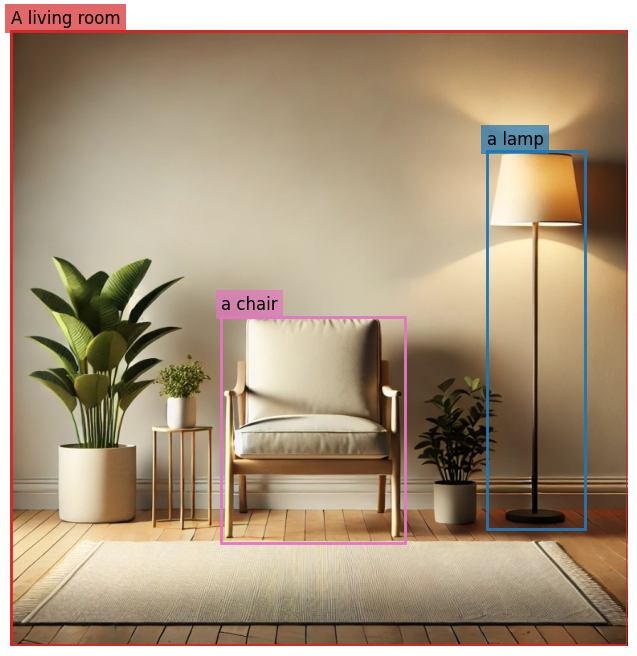

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

# Display the image
ax.imshow(image)

# Define a color map
color_map = plt.cm.get_cmap('tab10')  # 'tab10' has 10 distinct colors

# Assign a unique color to each label
unique_labels = list(set(labels))
label_colors = {label: color_map(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

# Add bounding boxes and labels
for bbox, label in zip(bboxes, labels):
    # Unpack the bounding box coordinates
    x1, y1, x2, y2 = bbox

    # Calculate width and height
    width = x2 - x1
    height = y2 - y1

    # Get the color for the current label
    color = label_colors[label]

    # Create a rectangle patch
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')

    # Add the rectangle to the plot
    ax.add_patch(rect)

    # Add the label with a matching background color
    plt.text(x1, y1 - 10, label, color='black', fontsize=12,
             bbox=dict(facecolor=color, edgecolor='none', alpha=0.7))

# Remove axis
plt.axis('off')

# Show the plot
plt.show()